In [ ]:
print("OM")

OM


**1.Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


**2.Uploading Dataset**

In [ ]:
store = pd.read_csv("/content/store.csv")
test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")

<ipython-input-11-f05c5b0cf59d>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("/content/train.csv")


**3.Finding Common Column to merge the dataset**

In [ ]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [ ]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,7/31/2015,5263,555,1,1,0,1
1,2,5,7/31/2015,6064,625,1,1,0,1
2,3,5,7/31/2015,8314,821,1,1,0,1
3,4,5,7/31/2015,13995,1498,1,1,0,1
4,5,5,7/31/2015,4822,559,1,1,0,1


**4.Merging Dataset and Store as a csv**

In [ ]:
merged_train = pd.merge(train,store, on = "Store") #Store Column
merged_test = pd.merge(test,store, on = "Store")

In [ ]:
merged_train.to_csv("merged_train.csv", index = False)
merged_test.to_csv("merged_test.csv", index = False)

**5.Checking Time-Series (Sales) Trends ???**

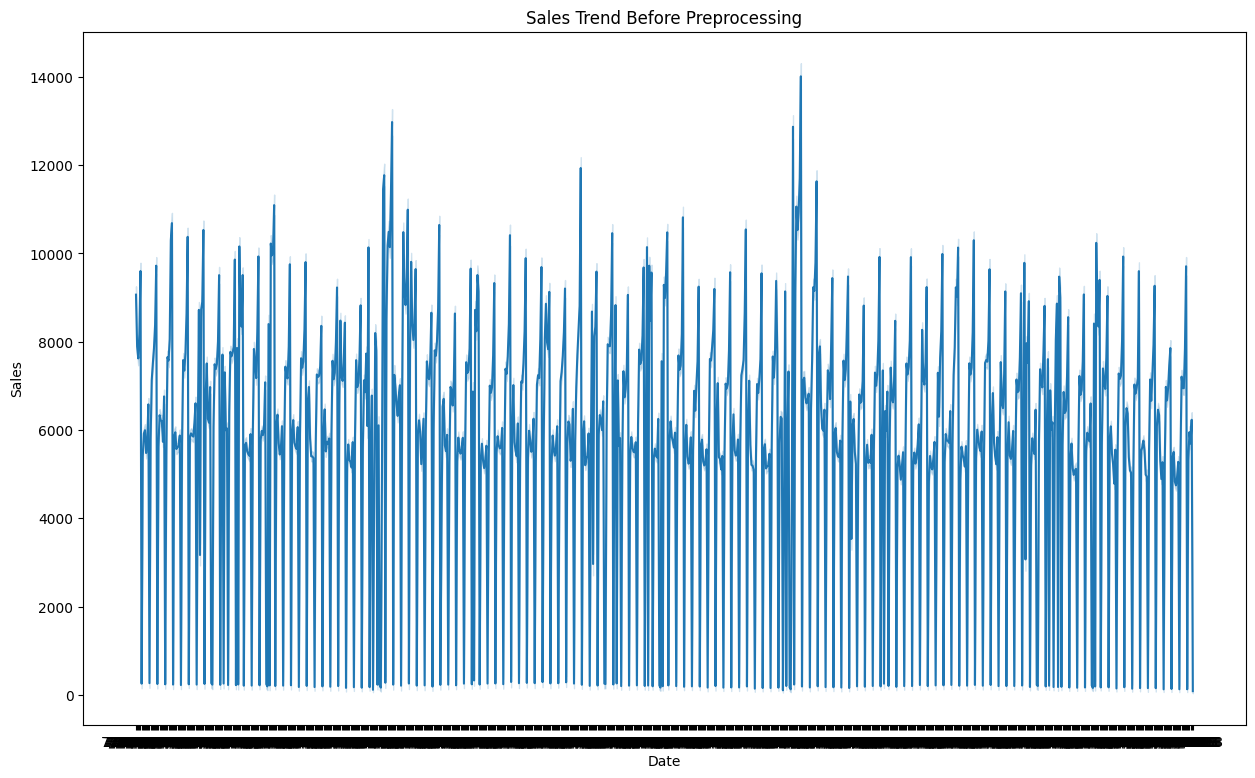

In [ ]:
plt.figure(figsize= (15,9))

sns.lineplot(x='Date', y='Sales', data=merged_train)
plt.title("Sales Trend Before Preprocessing")
plt.show()

**6.Data Exploration and Cleaning**

In [ ]:
merged_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,7/31/2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,7/31/2015,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,7/31/2015,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,7/31/2015,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,7/31/2015,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
merged_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


**6(a).Checking the shape, null values, data type, statistical insights and unique values**

In [ ]:
print(merged_train.shape)
print(merged_test.shape)

(1017209, 18)
(41088, 17)


In [ ]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
merged_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [ ]:
merged_train.nunique()

,0
Store,1115
DayOfWeek,7
Date,942
Sales,21734
Customers,4086
Open,2
Promo,2
StateHoliday,5
SchoolHoliday,2
StoreType,4


In [ ]:
merged_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

In [ ]:
merged_test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000,40992.000000,25872.000000,25872.000000,41088.000000,23856.000000,23856.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487,5088.583138,7.035250,2008.641929,0.580607,24.426559,2011.820926
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802,7225.487467,3.143015,6.862400,0.493466,14.161312,1.692166
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000,720.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000,2425.000000,7.000000,2010.000000,1.000000,22.000000,2012.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000,6480.000000,9.000000,2012.000000,1.000000,37.000000,2013.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,49.000000,2015.000000


In [ ]:
merged_test.nunique()

,0
Id,41088
Store,856
DayOfWeek,7
Date,48
Open,2
Promo,2
StateHoliday,2
SchoolHoliday,2
StoreType,4
Assortment,3


**We can visualize null values but we have already checked null values from info()**

**6(b).Checking Outliers and Skewness of Data**

In [ ]:
x = merged_train.drop(columns= "Sales", axis=1)
y= merged_train["Sales"]

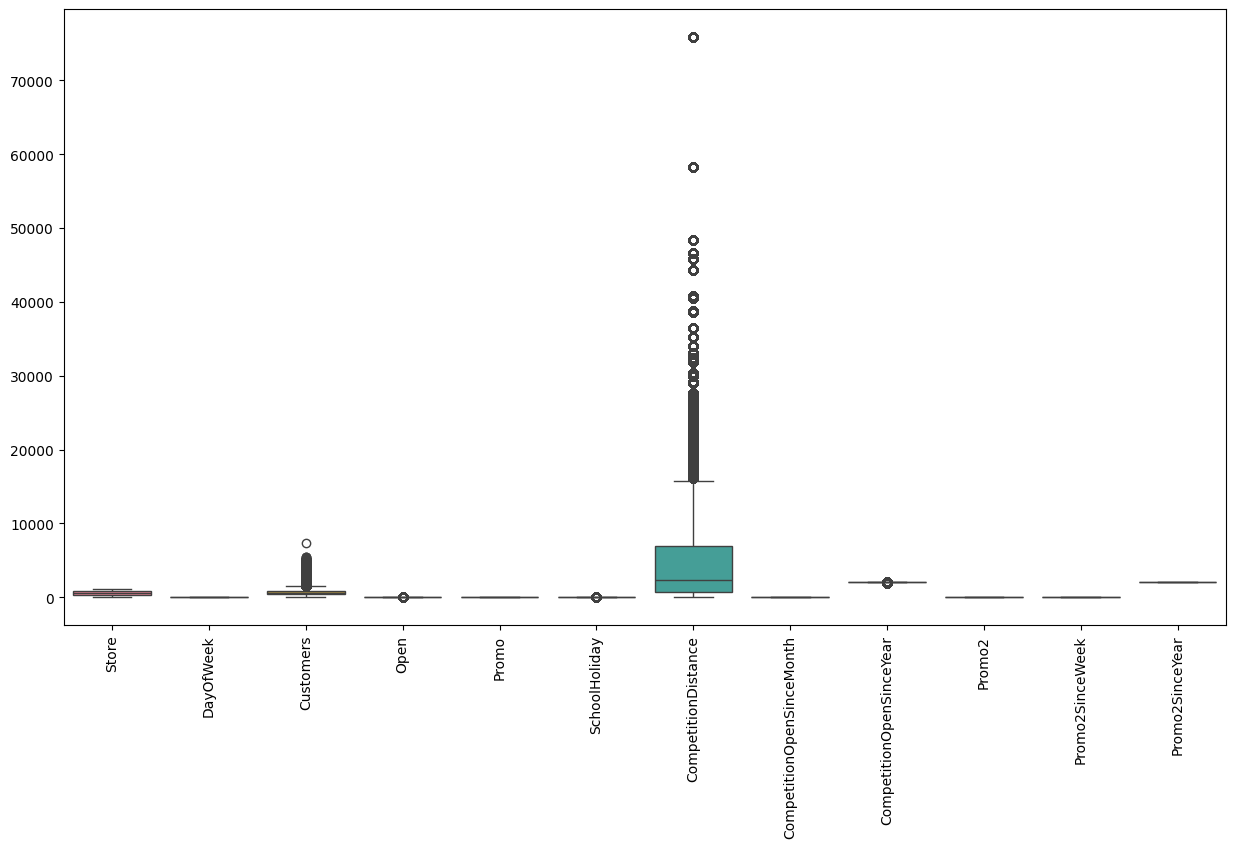

In [ ]:
fig, axes = plt.subplots(figsize=(15, 8))
sns.boxplot(data=x, ax=axes)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='CompetitionOpenSinceMonth', ylabel='Count'>

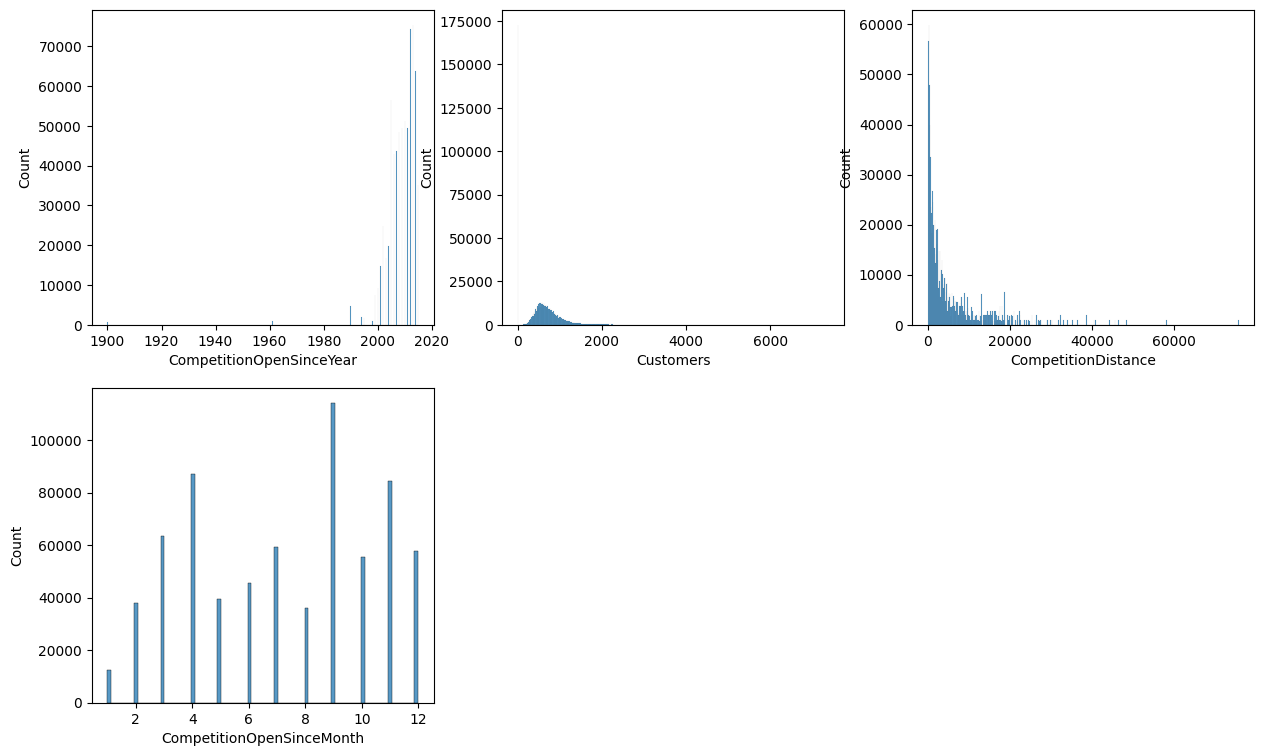

In [ ]:
plt.figure(figsize= (15,9))
plt.subplot(2,3,1)
sns.histplot(merged_train["CompetitionOpenSinceYear"])
plt.subplot(2,3,2)
sns.histplot(merged_train["Customers"])
plt.subplot(2,3,3)
sns.histplot(merged_train["CompetitionDistance"])
plt.subplot(2,3,4)
sns.histplot(merged_train["CompetitionOpenSinceMonth"])

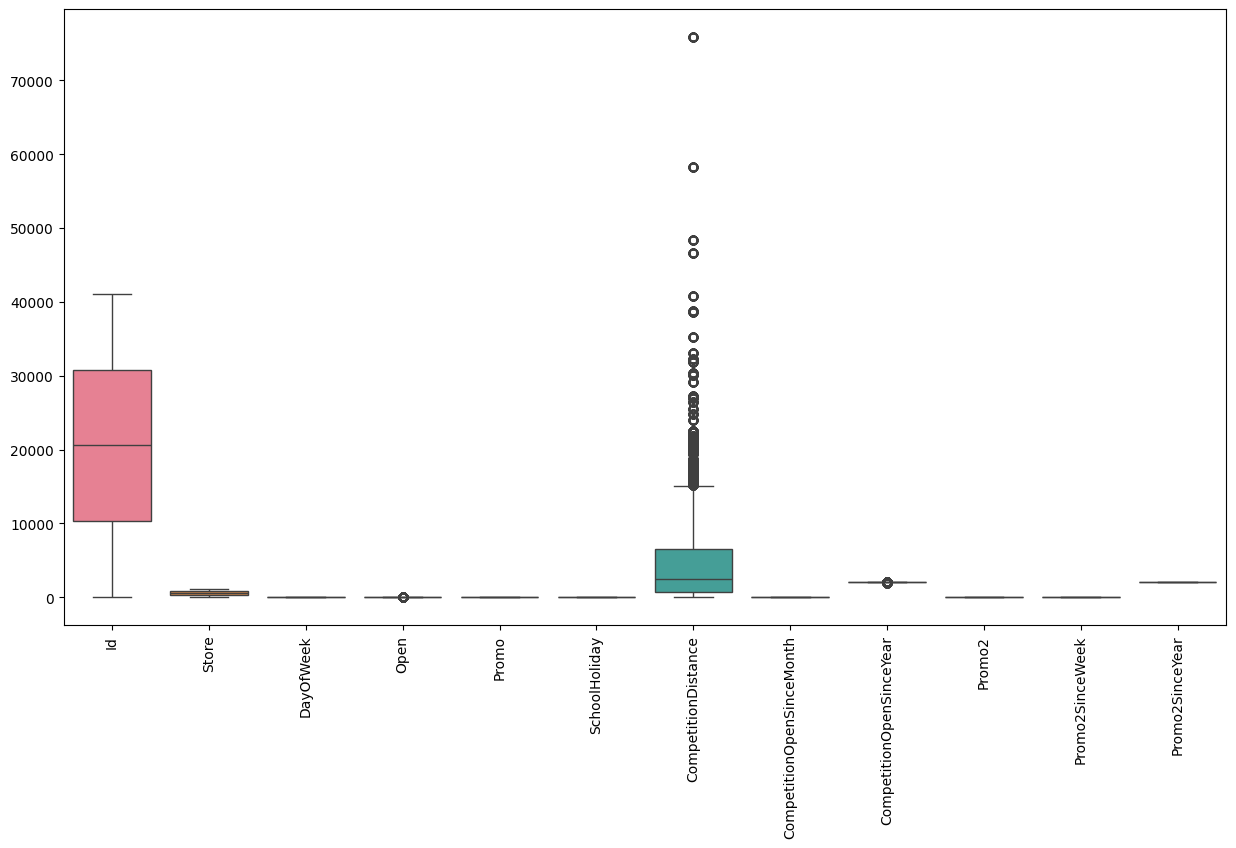

In [ ]:
fig, axes = plt.subplots(figsize=(15, 8))
sns.boxplot(data=merged_test, ax=axes)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='CompetitionOpenSinceYear', ylabel='Count'>

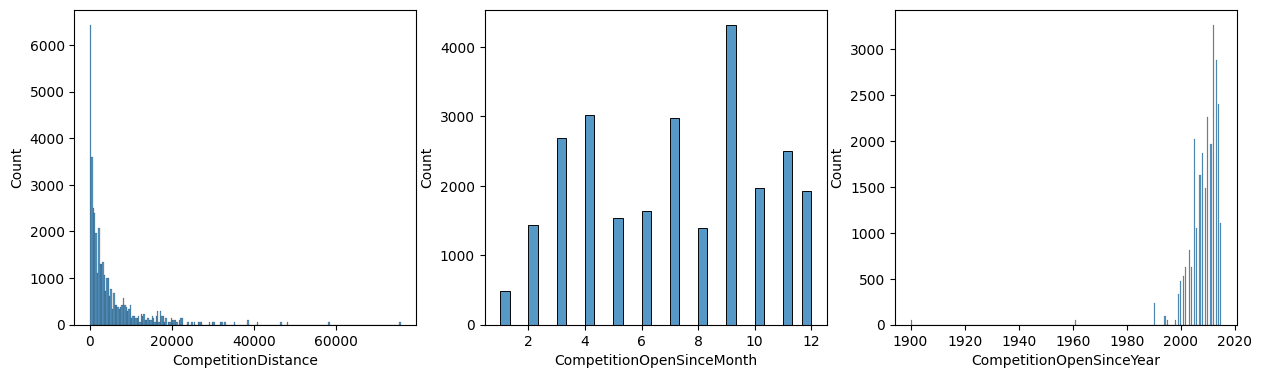

In [ ]:
plt.figure(figsize= (15,9))

plt.subplot(2,3,1)
sns.histplot(merged_test["CompetitionDistance"])
plt.subplot(2,3,2)
sns.histplot(merged_test["CompetitionOpenSinceMonth"])
plt.subplot(2,3,3)
sns.histplot(merged_test["CompetitionOpenSinceYear"])

**6(c).Removing the Outliers by IQR Method (Interquartile Range) because of skewness of data**

**Capping instead of removing outliers(because when we apply the IQR, we lost a large amount of data)**

In [ ]:
columns = ["Customers", "CompetitionDistance", "CompetitionOpenSinceYear"]

for col in columns:
    lower_bound = merged_train[col].quantile(0.20)
    upper_bound = merged_train[col].quantile(0.80)
    merged_train[col] = np.clip(merged_train[col], lower_bound, upper_bound)

In [ ]:
columns_test = ["CompetitionDistance", "CompetitionOpenSinceYear"]

for col in columns_test:
    lower_bound = merged_test[col].quantile(0.20)
    upper_bound = merged_test[col].quantile(0.80)
    merged_test[col] = np.clip(merged_test[col], lower_bound, upper_bound)

In [ ]:
merged_train.shape

(1017209, 18)

In [ ]:
merged_test.shape

(41088, 17)

In [ ]:
merged_train.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


In [ ]:
merged_test.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,11
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0
Assortment,0


**6(d).Filling the null values**

In [ ]:
merged_train['CompetitionDistance']=merged_train['CompetitionDistance'].fillna(merged_train['CompetitionDistance'].mean())
merged_train['CompetitionOpenSinceMonth']=merged_train['CompetitionOpenSinceMonth'].fillna(merged_train['CompetitionOpenSinceMonth'].mode()[0])
merged_train['CompetitionOpenSinceYear']=merged_train['CompetitionOpenSinceYear'].fillna(merged_train['CompetitionOpenSinceYear'].mode()[0])
merged_train['Promo2SinceWeek']=merged_train['Promo2SinceWeek'].fillna(0) #use 0 for not opting for the promo
merged_train['Promo2SinceYear']=merged_train['Promo2SinceYear'].fillna(0)
merged_train['PromoInterval']=merged_train['PromoInterval'].fillna('none')


In [ ]:
merged_train.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


In [ ]:
merged_test['CompetitionDistance']=merged_test['CompetitionDistance'].fillna(merged_test['CompetitionDistance'].mean())
merged_test['CompetitionOpenSinceMonth']=merged_test['CompetitionOpenSinceMonth'].fillna(merged_test['CompetitionOpenSinceMonth'].mode()[0])
merged_test['CompetitionOpenSinceYear']=merged_test['CompetitionOpenSinceYear'].fillna(merged_test['CompetitionOpenSinceYear'].mode()[0])
merged_test['Promo2SinceWeek']=merged_test['Promo2SinceWeek'].fillna(0)
merged_test['Promo2SinceYear']=merged_test['Promo2SinceYear'].fillna(0)
merged_test['PromoInterval']=merged_test['PromoInterval'].fillna('none')
merged_test['Open']=merged_test['Open'].fillna(1) #asuming stores are open

In [ ]:
merged_test.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0
Assortment,0


**7.Feature Engineering & Data Type**

In [ ]:
merged_train.dtypes

,0
Store,int64
DayOfWeek,int64
Date,object
Sales,int64
Customers,int64
Open,int64
Promo,int64
StateHoliday,object
SchoolHoliday,int64
StoreType,object


In [ ]:
merged_test.dtypes

,0
Id,int64
Store,int64
DayOfWeek,int64
Date,object
Open,float64
Promo,int64
StateHoliday,object
SchoolHoliday,int64
StoreType,object
Assortment,object


**7(a).Converting "object" data type into "date" data type in "Date" column**

In [ ]:
merged_train["Date"] = pd.to_datetime(merged_train["Date"])
merged_test["Date"] = pd.to_datetime(merged_test["Date"])

**7(b).Checking data leakage in date**

In [ ]:
train_min_date = merged_train["Date"].min()
train_max_date = merged_train["Date"].max()

invalid_test_dates = merged_test[merged_test["Date"] < train_min_date]

print(train_min_date)
print(train_max_date)
print(invalid_test_dates.shape)

2013-01-01 00:00:00
2015-07-31 00:00:00
(0, 17)


**7(c).Date feature extracting**

In [ ]:
merged_train['Year'] = merged_train['Date'].dt.year
merged_train['Month'] = merged_train['Date'].dt.month
merged_train['Day'] = merged_train['Date'].dt.day
merged_train['Week'] = merged_train['Date'].dt.isocalendar().week
merged_train['Quarter'] = merged_train['Date'].dt.quarter

In [ ]:
merged_test['Year'] = merged_test['Date'].dt.year
merged_test['Month'] = merged_test['Date'].dt.month
merged_test['Day'] = merged_test['Date'].dt.day
merged_test['Week'] = merged_test['Date'].dt.isocalendar().week
merged_test['Quarter'] = merged_test['Date'].dt.quarter

In [ ]:
merged_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,Week,Quarter
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,0.0,0.0,none,2015,7,31,31,3
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,3
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,3
3,4,5,2015-07-31,13995,903,1,1,0,1,c,...,2009.0,0,0.0,0.0,none,2015,7,31,31,3
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2013.0,0,0.0,0.0,none,2015,7,31,31,3


In [ ]:
merged_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,Week,Quarter
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,...,2008.0,0,0.0,0.0,none,2015,9,17,38,3
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,3
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,...,2013.0,0,0.0,0.0,none,2015,9,17,38,3
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,...,2013.0,0,0.0,0.0,none,2015,9,17,38,3
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,...,2005.0,0,0.0,0.0,none,2015,9,17,38,3


**7(d).Checking unique values in the columns in which we are going to change the data type**

In [ ]:
print(merged_train.StateHoliday.unique())
print(merged_train.StoreType.unique())
print(merged_train.Assortment.unique())
print(merged_train.PromoInterval.unique())

['0' 'a' 'b' 'c' 0]
['c' 'a' 'd' 'b']
['a' 'c' 'b']
['none' 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [ ]:
print(merged_test.StateHoliday.unique())
print(merged_test.StoreType.unique())
print(merged_test.Assortment.unique())
print(merged_test.PromoInterval.unique())

['0' 'a']
['c' 'a' 'd' 'b']
['a' 'c' 'b']
['none' 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


**7(e).The test data contains 2 unique values(StateHoliday), while the train data contains 5. We are analyzing this and took appropriate steps(Label Encoding)**

In [ ]:
merged_train.StateHoliday.value_counts()

,count
StateHoliday,
0,855087
0,131072
a,20260
b,6690
c,4100


In [ ]:
merged_train["StateHoliday"] = merged_train["StateHoliday"].astype(str) # we are doing this first because there are two occurrences of "0" in the data- one as a string and the other as an integer
merged_train["StateHoliday"] = merged_train["StateHoliday"].apply(lambda x: 1 if x in ["a", "b", "c"] else 0) # Label Encoding (Mapping holidays: 0 = No Holiday, 1 = Holiday (a, b, c))

In [ ]:
StateHolidayMapping = {"a": 1, "0": 0}
merged_test["StateHoliday"] = merged_test["StateHoliday"].map(StateHolidayMapping)

In [ ]:
StoreTypeMapping = {"a": 1, "b": 2, "c": 3, "d": 4}

merged_train["StoreType"] = merged_train["StoreType"].map(StoreTypeMapping)
merged_test["StoreType"] = merged_test["StoreType"].map(StoreTypeMapping)

In [ ]:
AssortmentMapping = {"a": 1, "b": 2, "c": 3}

merged_train["Assortment"] = merged_train["Assortment"].map(AssortmentMapping)
merged_test["Assortment"] = merged_test["Assortment"].map(AssortmentMapping)

In [ ]:
PromoIntervalMapping = {"Jan,Apr,Jul,Oct": 1, "Feb,May,Aug,Nov": 2, "Mar,Jun,Sept,Dec": 3, "none": 0}

merged_train["PromoInterval"] = merged_train["PromoInterval"].map(PromoIntervalMapping)
merged_test["PromoInterval"] = merged_test["PromoInterval"].map(PromoIntervalMapping)

In [ ]:
merged_train.dtypes

,0
Store,int64
DayOfWeek,int64
Date,datetime64[ns]
Sales,int64
Customers,int64
Open,int64
Promo,int64
StateHoliday,int64
SchoolHoliday,int64
StoreType,int64


In [ ]:
merged_test.dtypes

,0
Id,int64
Store,int64
DayOfWeek,int64
Date,datetime64[ns]
Open,float64
Promo,int64
StateHoliday,int64
SchoolHoliday,int64
StoreType,int64
Assortment,int64


**7(f)Checking Duplicates**

In [ ]:
print(f"Duplicate records in train dataset : {merged_train.duplicated().sum()}")

print(f"Duplicate records in test dataset : {merged_test.duplicated().sum()}")

Duplicate records in train dataset : 0
Duplicate records in test dataset : 0


**7(g).Feature Importance Analysis (Correlation, Mutual Information)**

**7(g)(1).Checking correlation between features and the target variable**

In [ ]:
correlation_matrix = merged_train.corr()

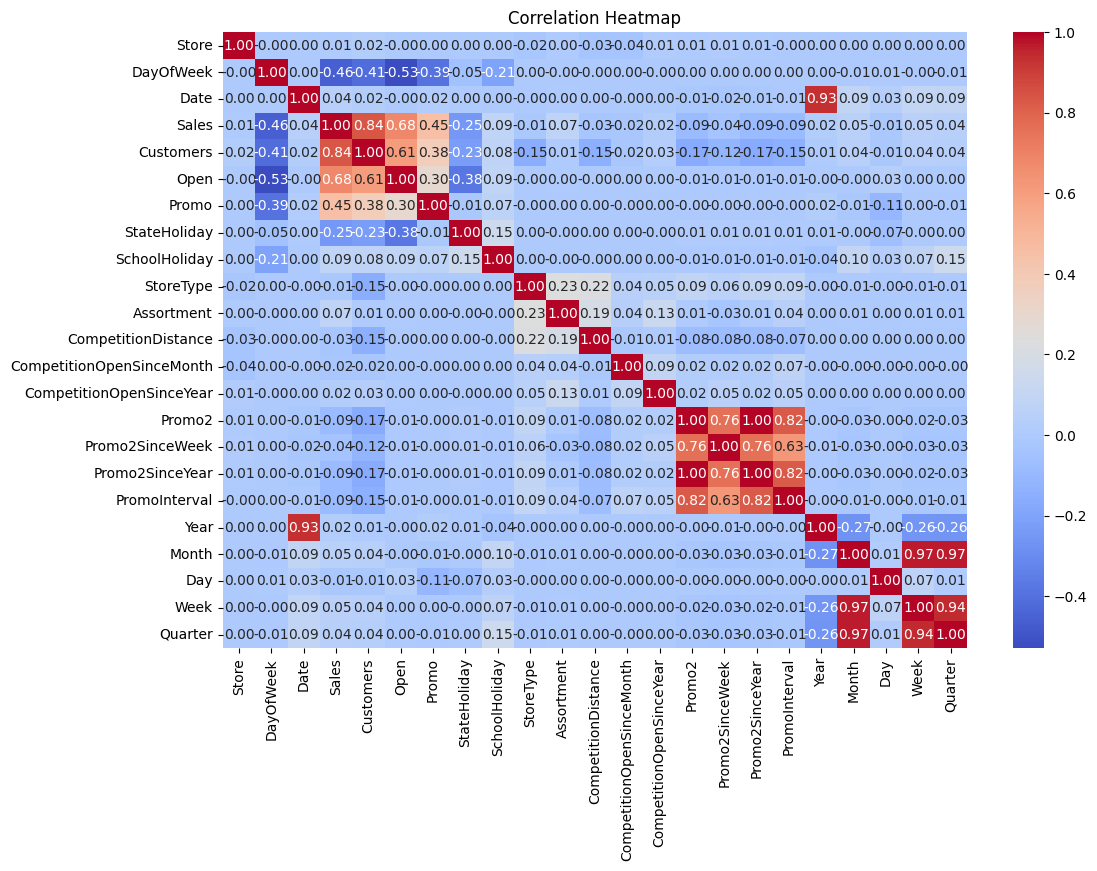

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**7(g)(2).Mutual Information Analysis**

<ipython-input-63-89e1561e6066>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Correlation", y="Feature", data=correlation_df, palette="coolwarm")


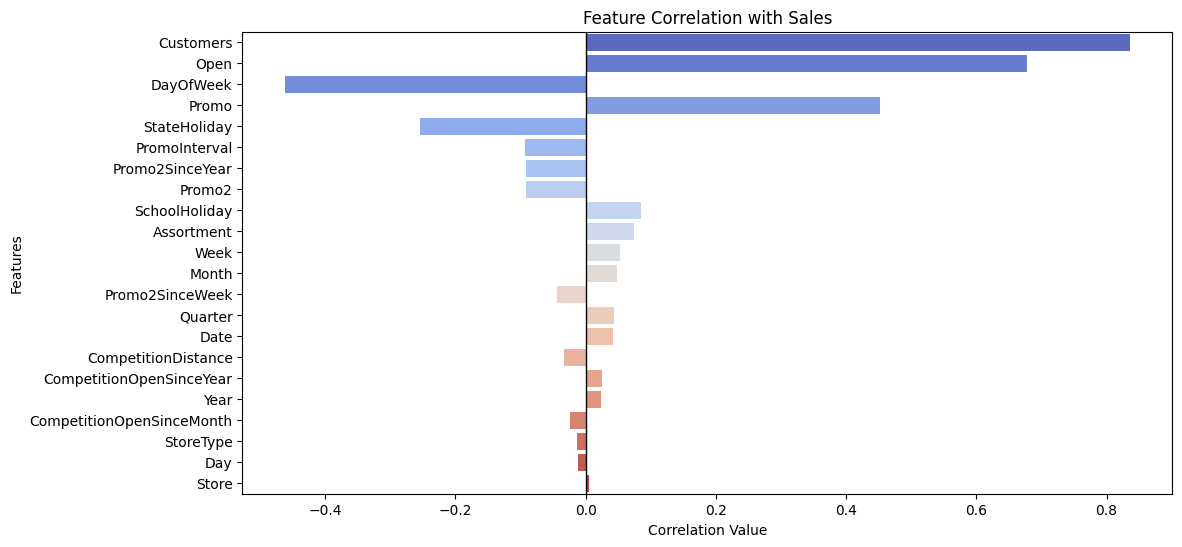

                      Feature  Correlation  Absolute Correlation
3                   Customers     0.836168              0.836168
4                        Open     0.678472              0.678472
1                   DayOfWeek    -0.462125              0.462125
5                       Promo     0.452345              0.452345
6                StateHoliday    -0.254216              0.254216
16              PromoInterval    -0.092635              0.092635
15            Promo2SinceYear    -0.091056              0.091056
13                     Promo2    -0.091040              0.091040
7               SchoolHoliday     0.085124              0.085124
9                  Assortment     0.074941              0.074941
20                       Week     0.052946              0.052946
18                      Month     0.048768              0.048768
14            Promo2SinceWeek    -0.044143              0.044143
21                    Quarter     0.043984              0.043984
2                        

In [ ]:
correlation = merged_train.corr()["Sales"].drop("Sales")

correlation_df = pd.DataFrame({"Feature": correlation.index, "Correlation": correlation.values})
correlation_df["Absolute Correlation"] = correlation_df["Correlation"].abs()
correlation_df = correlation_df.sort_values(by="Absolute Correlation", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Correlation", y="Feature", data=correlation_df, palette="coolwarm")
plt.axvline(x=0, color="black", linewidth=1)  # Add a vertical line at zero for reference
plt.title("Feature Correlation with Sales")
plt.xlabel("Correlation Value")
plt.ylabel("Features")
plt.show()

print(correlation_df)


**7(g)(3).features to remove**

In [ ]:
drop_columns = [
    "Customers", "Open", "PromoInterval",
    "CompetitionOpenSinceYear", "CompetitionOpenSinceMonth",
    "SchoolHoliday", "Year"
]

merged_train.drop(columns=drop_columns, inplace=True, errors="ignore")
merged_test.drop(columns=drop_columns, inplace=True, errors="ignore")

print("Remaining Features After Selection:", merged_train.columns)


Remaining Features After Selection: Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Promo', 'StateHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Month', 'Day', 'Week',
       'Quarter'],
      dtype='object')


**7(h).Feature Scaling**

In [ ]:
merged_train.head()

,Store,DayOfWeek,Date,Sales,Promo,StateHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,Month,Day,Week,Quarter
0,1,5,2015-07-31,5263,1,0,3,1,1270.0,0,0.0,0.0,7,31,31,3
1,2,5,2015-07-31,6064,1,0,1,1,570.0,1,13.0,2010.0,7,31,31,3
2,3,5,2015-07-31,8314,1,0,1,1,8740.0,1,14.0,2011.0,7,31,31,3
3,4,5,2015-07-31,13995,1,0,3,3,620.0,0,0.0,0.0,7,31,31,3
4,5,5,2015-07-31,4822,1,0,1,1,8740.0,0,0.0,0.0,7,31,31,3


<Axes: xlabel='Promo2SinceWeek', ylabel='Count'>

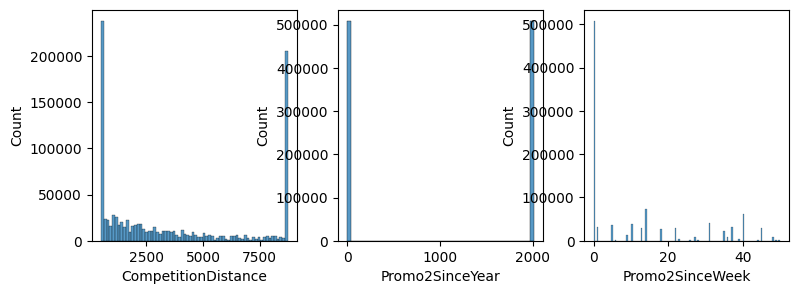

In [ ]:
plt.figure(figsize= (9,3))
plt.subplot(1,3,1)
sns.histplot(merged_train["CompetitionDistance"])
plt.subplot(1,3,2)
sns.histplot(merged_train["Promo2SinceYear"])
plt.subplot(1,3,3)
sns.histplot(merged_train["Promo2SinceWeek"])

In [ ]:
# Apply log transformation (adding 1 to avoid log(0))
merged_train['CompetitionDistance'] = np.log1p(merged_train['CompetitionDistance'])
merged_test['CompetitionDistance'] = np.log1p(merged_test['CompetitionDistance'])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

merged_train[['Promo2SinceYear', 'Promo2SinceWeek']] = scaler.fit_transform(merged_train[['Promo2SinceYear', 'Promo2SinceWeek']])
merged_test[['Promo2SinceYear', 'Promo2SinceWeek']] = scaler.transform(merged_test[['Promo2SinceYear', 'Promo2SinceWeek']])


<Axes: xlabel='Promo2SinceWeek', ylabel='Count'>

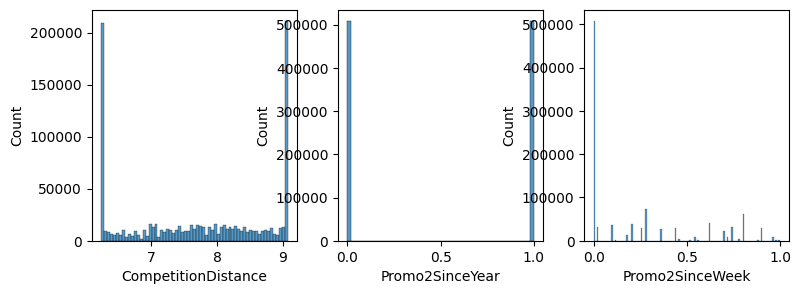

In [ ]:
plt.figure(figsize= (9,3))
plt.subplot(1,3,1)
sns.histplot(merged_train["CompetitionDistance"])
plt.subplot(1,3,2)
sns.histplot(merged_train["Promo2SinceYear"])
plt.subplot(1,3,3)
sns.histplot(merged_train["Promo2SinceWeek"])

In [ ]:
merged_train.head()

,Store,DayOfWeek,Date,Sales,Promo,StateHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,Month,Day,Week,Quarter
0,1,5,2015-07-31,5263,1,0,3,1,7.147559,0,0.00,0.000000,7,31,31,3
1,2,5,2015-07-31,6064,1,0,1,1,6.347389,1,0.26,0.997519,7,31,31,3
2,3,5,2015-07-31,8314,1,0,1,1,9.075780,1,0.28,0.998015,7,31,31,3
3,4,5,2015-07-31,13995,1,0,3,3,6.431331,0,0.00,0.000000,7,31,31,3
4,5,5,2015-07-31,4822,1,0,1,1,9.075780,0,0.00,0.000000,7,31,31,3


**8.Final check before working on Model**

In [ ]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Promo                1017209 non-null  int64         
 5   StateHoliday         1017209 non-null  int64         
 6   StoreType            1017209 non-null  int64         
 7   Assortment           1017209 non-null  int64         
 8   CompetitionDistance  1017209 non-null  float64       
 9   Promo2               1017209 non-null  int64         
 10  Promo2SinceWeek      1017209 non-null  float64       
 11  Promo2SinceYear      1017209 non-null  float64       
 12  Month                1017209 non-null  int32         
 1

In [ ]:
merged_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   41088 non-null  int64         
 1   Store                41088 non-null  int64         
 2   DayOfWeek            41088 non-null  int64         
 3   Date                 41088 non-null  datetime64[ns]
 4   Promo                41088 non-null  int64         
 5   StateHoliday         41088 non-null  int64         
 6   StoreType            41088 non-null  int64         
 7   Assortment           41088 non-null  int64         
 8   CompetitionDistance  41088 non-null  float64       
 9   Promo2               41088 non-null  int64         
 10  Promo2SinceWeek      41088 non-null  float64       
 11  Promo2SinceYear      41088 non-null  float64       
 12  Month                41088 non-null  int32         
 13  Day                  41088 non-

**9.Model Building**

**9(a)Splitting Data (Train-Test Split)**

In [ ]:
from sklearn.model_selection import train_test_split

X = merged_train.drop(columns=["Sales", "Date"], errors="ignore")  # we are dropping date because we already extracted useful feature from it
y = merged_train["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (813767, 14)
Test set size: (203442, 14)


**9(b).Building a Baseline (Linear Regression) Model & Evaluate**

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Linear Regression Performance:
RMSE: 2993.55
R² Score: 0.39


**9(c). Building XGBoost Regressor Model & Evaluate**

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

In [ ]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regressor Performance:")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.2f}")

XGBoost Regressor Performance:
RMSE: 1836.03
R² Score: 0.77


**10.Feature Importance Analysis**

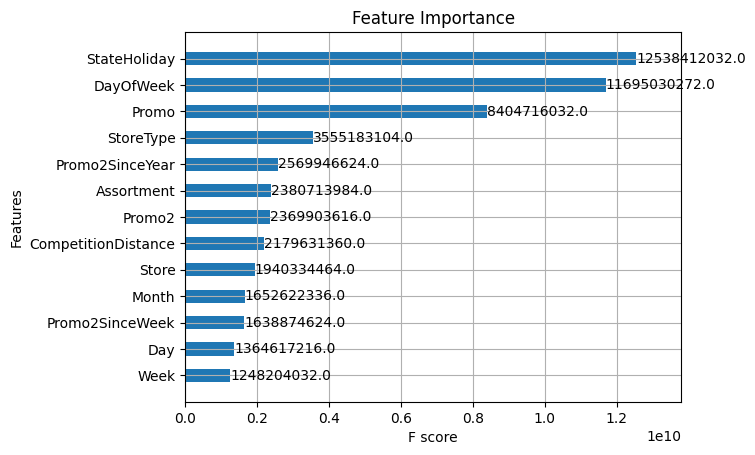

In [ ]:
import xgboost as xgb

# Get feature importance from the trained XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X, y)

xgb.plot_importance(xgb_model, height=0.5, importance_type="gain")
plt.title("Feature Importance")
plt.show()


**11.Residual Error (Analysis)**

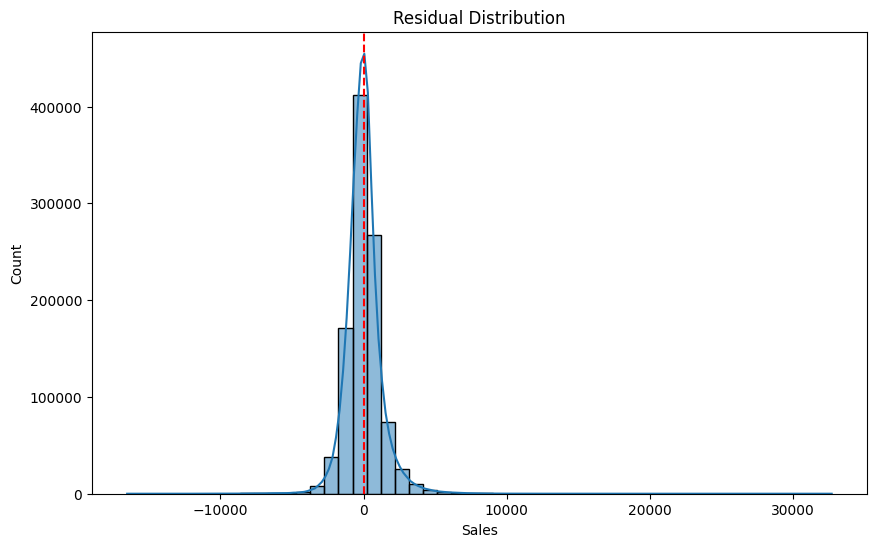

In [ ]:
# Predictions
y_pred = xgb_model.predict(X)

# Residuals
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.axvline(x=0, color="red", linestyle="--")  # Ideal residuals are centered around 0
plt.title("Residual Distribution")
plt.show()


**12.Model Deployment Readiness**

In [ ]:
import joblib

joblib.dump(xgb_model, "xgboost_sales_model.pkl")
print("Model saved successfully!")

'''xgb_loaded = joblib.load("xgboost_sales_model.pkl")''' #Load the Model Later


Model saved successfully!


'xgb_loaded = joblib.load("xgboost_sales_model.pkl")'

**13.Making Predictions on Test Data**

In [ ]:
X_final_test = merged_test.drop(columns=["Date", "Id"], errors="ignore")  # Drop 'Date' if it exists

# Ensure feature names match those in X_train
missing_cols = set(X_train.columns) - set(X_final_test.columns)
extra_cols = set(X_final_test.columns) - set(X_train.columns)

print(f"Missing columns in test data: {missing_cols}")
print(f"Extra columns in test data: {extra_cols}")

Missing columns in test data: set()
Extra columns in test data: set()


In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

In [ ]:
# Make predictions on the test data
y_pred_final = xgb.predict(X_final_test)

# If you want to submit the predictions or analyze them:
merged_test['PredictedSales'] = y_pred_final

# Optionally save predictions to a CSV file
merged_test[['Store', 'Date', 'PredictedSales']].to_csv("final_predictions.csv", index=False)


**14.Ending**

In [ ]:
print("Thank You")

Thank You
